In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

문제
* data4/프로야구.csv 를 이용하여 아래를 작성하시요.
* target: 2018년 연봉 
* 나머지:feature(선수명은 제거)

### SGDRegress 모델의 r2 점수(train, test )를 출력하시요.

#### 데이터 로드

In [2]:
df = pd.read_csv('./data4/프로야구.csv')
df.drop('선수명', axis=1, inplace=True)
df

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,KIA,3,2,0,0,0,25,11,59.1,4.85,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,롯데,0,2,0,0,0,9,2,14.2,4.91,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [3]:
df.columns

Index(['팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

#### ColumnTransformer(One-hot Encoder)

In [4]:
ct = ColumnTransformer([('ohe',OneHotEncoder(sparse=False) ,['팀명']),
                        ('scaler', StandardScaler(), ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
                                                       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR','연봉(2017)'])])

####  데이터 분할

In [5]:
x_data, y_data = df.drop('연봉(2018)', axis=1), df[['연봉(2018)']] 

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1, test_size=0.2)

####  모델 생성 및 학습

In [8]:
model = make_pipeline(ct, SGDRegressor())
model.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  ['팀명']),
                                                 ('scaler', StandardScaler(),
                                                  ['승', '패', '세', '홀드', '블론',
                                                   '경기', '선발', '이닝', '삼진/9',
                                                   '볼넷/9', '홈런/9', 'BABIP',
                                                   'LOB%', 'ERA', 'RA9-WAR',
                                                   'FIP', 'kFIP', 'WAR',
                                                   '연봉(2017)'])])),
                ('sgdregressor', SGDRegressor())])

#### 결과

In [9]:
print('train score:', model.score(x_train, y_train))
print('test score:', model.score(x_test, y_test))

train score: 0.9326085631478772
test score: 0.7732413895361583


### heatmap을그리고 다중공선성 컬럼을 확인하고 다중공선성이 높은 컬럼을 제거후 SGDRegress  모델의 r2 점수(train, test )를 출력하시요.

#### 상관분석

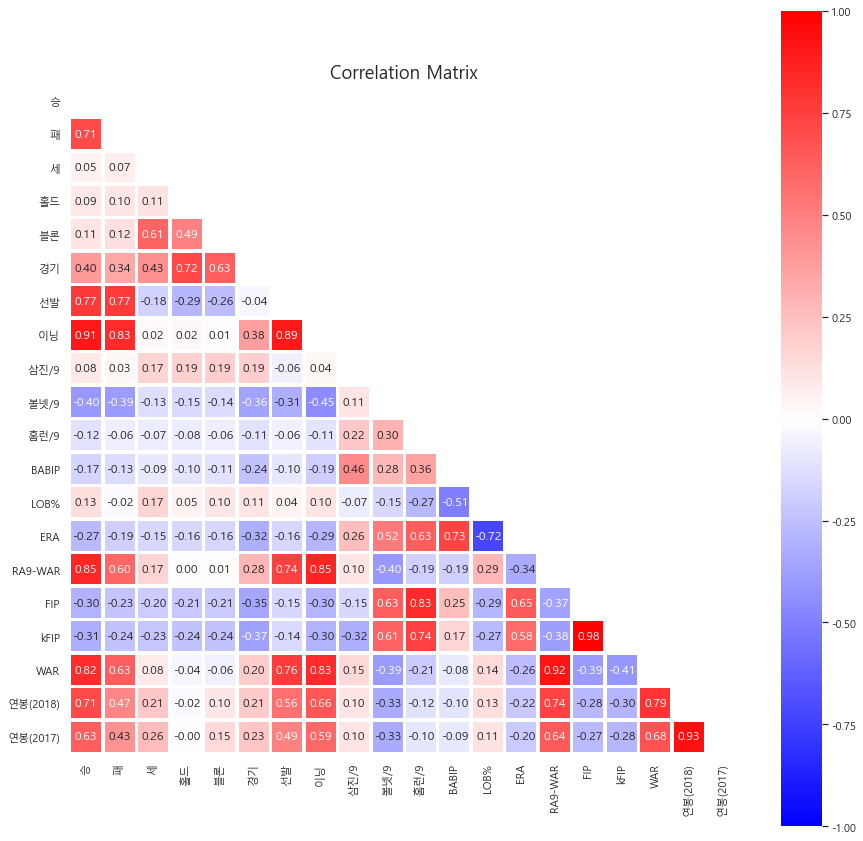

In [10]:
import seaborn as sns
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, style='white')

corr = df.corr()

plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(corr, mask=mask, cmap='bwr',vmin=-1, vmax=1,
            square=True, linewidths=2.5, annot=True, fmt='.2f')
plt.title('Correlation Matrix', fontsize=18)
plt.show()

#### 다중공선성

##### one-hot encoding

In [30]:
df_tmp =pd.get_dummies(df)
df_tmp

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,연봉(2017),팀명_KIA,팀명_KT,팀명_LG,팀명_NC,팀명_SK,팀명_두산,팀명_롯데,팀명_삼성,팀명_한화
0,16,7,0,0,0,30,30,190.0,8.95,2.13,...,85000,0,0,0,0,1,0,0,0,0
1,11,11,1,0,0,30,29,185.1,7.43,1.85,...,50000,0,0,1,0,0,0,0,0,0
2,20,6,0,0,0,31,31,193.1,7.36,2.09,...,150000,1,0,0,0,0,0,0,0,0
3,10,7,0,0,0,28,28,175.2,8.04,1.95,...,100000,0,0,1,0,0,0,0,0,0
4,13,7,0,0,0,30,30,187.1,7.49,2.11,...,85000,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2,5,0,0,2,33,5,62.2,4.31,3.30,...,8100,0,0,0,0,0,0,0,0,1
148,3,2,0,0,0,25,11,59.1,4.85,5.61,...,3100,1,0,0,0,0,0,0,0,0
149,0,2,0,0,0,9,2,14.2,4.91,4.91,...,16000,0,0,0,0,0,0,1,0,0
150,0,3,0,1,0,41,0,43.2,7.63,7.01,...,2900,0,0,0,0,0,0,0,1,0


##### 결과

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(df_tmp.values, i )  for i in range( df_tmp.shape[1] ) ]
vif['features'] = df_tmp.columns
vif

,VIF Factor,features
0,8.238193,승
1,5.891983,패
2,3.121211,세
3,3.765259,홀드
4,2.981666,블론
5,14.770519,경기
6,40.335092,선발
7,64.086142,이닝
8,89.556958,삼진/9
9,57.878215,볼넷/9


#### FIP, kFIP 컬럼 제거

In [12]:
x_train_new, x_test_new = x_train.drop(columns=['FIP', 'kFIP']), x_test.drop(columns=['FIP', 'kFIP'])

#### 모델 생성 및 학습

In [13]:
ct = ColumnTransformer([('ohe',OneHotEncoder(sparse=False) ,['팀명']),
                        ('scaler', StandardScaler(), ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
                                                       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'WAR','연봉(2017)'])])

model = make_pipeline(ct, SGDRegressor())
model.fit(x_train_new, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  ['팀명']),
                                                 ('scaler', StandardScaler(),
                                                  ['승', '패', '세', '홀드', '블론',
                                                   '경기', '선발', '이닝', '삼진/9',
                                                   '볼넷/9', '홈런/9', 'BABIP',
                                                   'LOB%', 'ERA', 'RA9-WAR',
                                                   'WAR', '연봉(2017)'])])),
                ('sgdregressor', SGDRegressor())])

#### 결과

In [14]:
print('train score:', model.score(x_train_new, y_train))
print('test score:', model.score(x_test_new, y_test))

train score: 0.9327547275148669
test score: 0.7741395850182429


### Lasso 모델을 이용하여 r2 점수(train, test )를 출력하시요.

#### 모델 생성 및 학습

In [15]:
ct = ColumnTransformer([('ohe',OneHotEncoder(sparse=False) ,['팀명']),
                        ('scaler', StandardScaler(), ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
                                                       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR','연봉(2017)'])])
model  = make_pipeline(ct, Lasso())

In [16]:
param_grid = {'lasso__alpha':[0.1, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 10, 15, 20 ,50, 100, 1000,1500,2000,5000,6000,7500]}
grid = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=1, scoring='r2')
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['팀명']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['승',
                                                                          '패',
                                                                          '세',
                                                                          '홀드',
                                                                          '블론',
                                                                          '경기',
     

#### 모델 결과

In [17]:
grid.best_params_

{'lasso__alpha': 5000}

In [18]:
grid.best_score_

0.8492172324427184

#### train / test score 결과

In [19]:
print(grid.best_estimator_.score(x_train, y_train))
print(grid.best_estimator_.score(x_test, y_test))

0.8903207718889723
0.8171506878680973


 추가 문제
 1. [KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000]
의 연봉(2018)을 예측하시오

2. 팀별 평균 연봉(2018) Top5 를 구하시오.

3. 팀별 연봉상승률(2017->2018)을 구하시오.

### [KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000] 의 연봉(2018)을 예측하시오

#### 문제 dataframe 생성

In [20]:
xd = pd.DataFrame([['KIA', 20, 6, 0, 0, 0, 31, 31, 193.1, 7.36, 2.09, 0.79, 0.332, 72.1, 3.44, 6.54, 3.94, 3.82, 5.64, 150000]], 
                  columns= x_train.columns)
xd

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000


#### 새롭게 elasticnet 모델 생성 및 학습

In [21]:
ct = ColumnTransformer([('ohe',OneHotEncoder(sparse=False) ,['팀명']),
                        ('scaler', StandardScaler(), ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
                                                       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR','연봉(2017)'])])
model  = make_pipeline(ct, ElasticNet())
param_grid = {'elasticnet__alpha':[0.1, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 10, 15, 20 ,50, 100, 1000,1500,2000,5000,6000,7500], 
             'elasticnet__l1_ratio':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=1, scoring='r2')
grid.fit(x_train, y_train)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['팀명']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['승',
                                                                          '패',
                                                                          '세',
                                                                          '홀드',
                                                                          '블론',
                                                                          '경기',
     

In [22]:
#### best 결과

In [23]:
print(grid.best_estimator_)  # Lasso와 같은 결과
print('best 결과 :',grid.best_score_)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  ['팀명']),
                                                 ('scaler', StandardScaler(),
                                                  ['승', '패', '세', '홀드', '블론',
                                                   '경기', '선발', '이닝', '삼진/9',
                                                   '볼넷/9', '홈런/9', 'BABIP',
                                                   'LOB%', 'ERA', 'RA9-WAR',
                                                   'FIP', 'kFIP', 'WAR',
                                                   '연봉(2017)'])])),
                ('elasticnet', ElasticNet(alpha=5000, l1_ratio=1))])
best 결과 : 0.8492172324427184


In [24]:
grid.best_estimator_.predict(xd)

array([148549.26832704])

### 팀별 평균 연봉(2018) Top5

#### 팀별 평균 연봉(2018) Top5

In [25]:
연봉2018 = df.groupby('팀명')[['연봉(2018)']].mean()
top5_2018 = 연봉2018.sort_values('연봉(2018)', ascending=False).head(5)
top5_2018

,연봉(2018)
팀명,
KIA,29440.000000
롯데,26707.142857
LG,23444.444444
한화,21720.000000
두산,17980.000000


#### 시각화

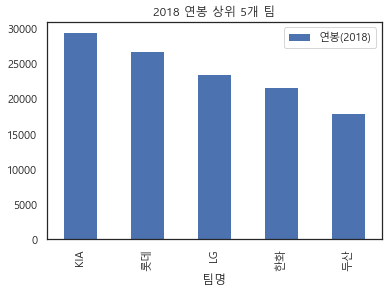

In [26]:
top5_2018.plot(kind='bar')
plt.title('2018 연봉 상위 5개 팀')
plt.show()

### 팀별 연봉상승률 (2017 -> 2018)

#### 평균 연봉표

In [27]:
연봉2017 = df.groupby('팀명')[['연봉(2017)']].mean()
연봉2018 = df.groupby('팀명')[['연봉(2018)']].mean()
연봉 = pd.concat([연봉2017, 연봉2018], axis=1)
연봉


,연봉(2017),연봉(2018)
팀명,,
KIA,22986.666667,29440.000000
KT,6710.526316,10184.210526
LG,18994.444444,23444.444444
NC,10138.461538,11353.846154
SK,12838.888889,17255.555556
두산,16853.333333,17980.000000
롯데,23264.285714,26707.142857
삼성,16170.000000,14220.000000
한화,21490.000000,21720.000000


#### 연봉상승률

In [28]:
연봉상승률 = (연봉.T.pct_change().loc[['연봉(2018)']]*100).T
연봉상승률

,연봉(2018)
팀명,
KIA,28.074246
KT,51.764706
LG,23.427903
NC,11.987860
SK,34.400692
두산,6.685127
롯데,14.798895
삼성,-12.059369
한화,1.070265


#### 시각화

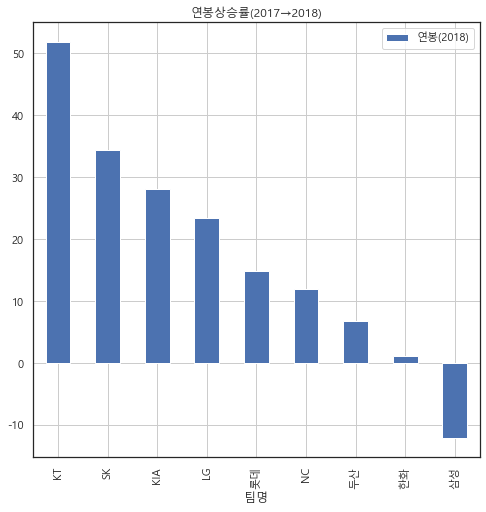

In [29]:
연봉상승률.sort_values('연봉(2018)', ascending=False).plot.bar(figsize=(8,8))
plt.title('연봉상승률(2017→2018)')
plt.grid()
plt.show()